# Human Action Recognition

    About Dataset

Train - contains all the images that are to be used for training your model. In this folder you will find 15 folders namely - 'calling', ’clapping’, ’cycling’, ’dancing’, ‘drinking’, ‘eating’, ‘fighting’, ‘hugging’, ‘laughing’, ‘listening_to_music’, ‘running’, ‘sitting’, ‘sleeping’, texting’, ‘using_laptop’ which contain the images of the respective human activities.

Test - contains 5400 images of Human Activities. For these images you are required to make predictions as the respective class names -'calling', ’clapping’, ’cycling’, ’dancing’, ‘drinking’, ‘eating’, ‘fighting’, ‘hugging’, ‘laughing’, ‘listening_to_music’, ‘running’, ‘sitting’, ‘sleeping’, texting’, ‘using_laptop’.

Testing_set.csv - this is the order of the predictions for each image that is to be submitted on the platform. Make sure the predictions you download are with their image’s filename in the same order as given in this file.

sample_submission: This is a csv file that contains the sample submission for the data sprint.

    Installing the required libraries

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install tensorflow

Importing the required libraries

In [32]:
import os
import glob
import random
import numpy as np
import pandas as pd

import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm

from PIL import Image

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50, InceptionV3
from sklearn.ensemble import VotingClassifier



import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt
import plotly.express as px

Loading the dataset

In [33]:
train_csv = pd.read_csv("../input/human-action-recognition-har-dataset/Human Action Recognition/Training_set.csv")
test_csv = pd.read_csv("../input/human-action-recognition-har-dataset/Human Action Recognition/Testing_set.csv")

In [34]:
train_fol = glob.glob("../input/human-action-recognition-har-dataset/Human Action Recognition/train/*") 
test_fol = glob.glob("../input/human-action-recognition-har-dataset/Human Action Recognition/test/*")

In [35]:
train_csv

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


Checking the dataset is balanced or not

In [36]:
train_csv.label.value_counts()

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64

In [37]:
l = train_csv.label.value_counts()
fig = px.pie(train_csv, values=l.values, names=l.index, title='Distribution of Human Activity')
fig.show()

Data pre-processing

In [38]:
X_train = train_csv['filename']
y_train = train_csv['label']

In [40]:
img_data = []
img_label = []
length = len(train_fol)
for i in (range(len(train_fol)-1)):
    t = '../input/human-action-recognition-har-dataset/Human Action Recognition/train/' + X_train[i]    
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(y_train[i])

In [41]:
inp_shape = (160, 160,3)

In [42]:
iii = img_data
iii = np.asarray(iii)
type(iii)

numpy.ndarray

In [43]:
Y_train = to_categorical(np.asarray(train_csv['label'].factorize()[0]))
print(y_train[0])

sitting


    Model creation, training and saving

In [47]:
inception_model = Sequential()
inception_model.add(InceptionV3(include_top=False, pooling='avg', weights='imagenet'))
inception_model.add(Dense(15, activation='softmax'))
inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

inception_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense_3 (Dense)             (None, 15)                30735     
                                                                 
Total params: 21,833,519
Trainable params: 21,799,087
Non-trainable params: 34,432
_________________________________________________________________


In [48]:
history = inception_model.fit(iii,Y_train, epochs=18)

Epoch 1/18
394/394 [==============================] - 73s 87ms/step - loss: 1.8451 - accuracy: 0.4168
Epoch 2/18
394/394 [==============================] - 34s 87ms/step - loss: 1.4110 - accuracy: 0.5603
Epoch 3/18
394/394 [==============================] - 34s 87ms/step - loss: 1.2065 - accuracy: 0.6225
Epoch 4/18
394/394 [==============================] - 34s 87ms/step - loss: 0.9467 - accuracy: 0.6980
Epoch 5/18
394/394 [==============================] - 34s 87ms/step - loss: 0.7785 - accuracy: 0.7544
Epoch 6/18
394/394 [==============================] - 34s 87ms/step - loss: 0.6308 - accuracy: 0.7989
Epoch 7/18
394/394 [==============================] - 34s 87ms/step - loss: 0.5095 - accuracy: 0.8377
Epoch 8/18
394/394 [==============================] - 34s 87ms/step - loss: 0.4178 - accuracy: 0.8652
Epoch 9/18
394/394 [==============================] - 34s 87ms/step - loss: 0.3323 - accuracy: 0.8931
Epoch 10/18
394/394 [==============================] - 34s 87ms/step - loss: 0.294

In [49]:
inception_model.save_weights("inception_model.h5")
from IPython.display import FileLink
FileLink("inception_model.h5")

/kaggle/working/inception_model.h5

In [50]:
inception_model.save_weights("inception_model.h5")

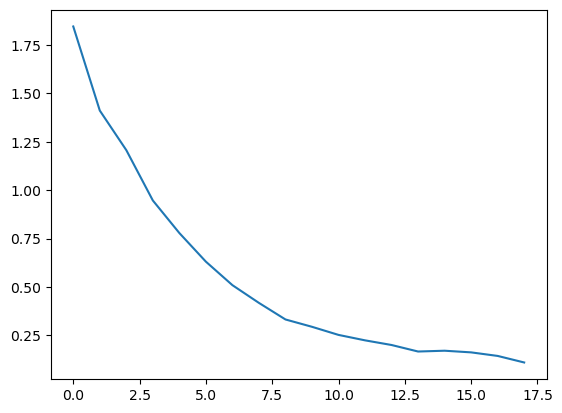

In [51]:
losss = history.history['loss']
plt.plot(losss)


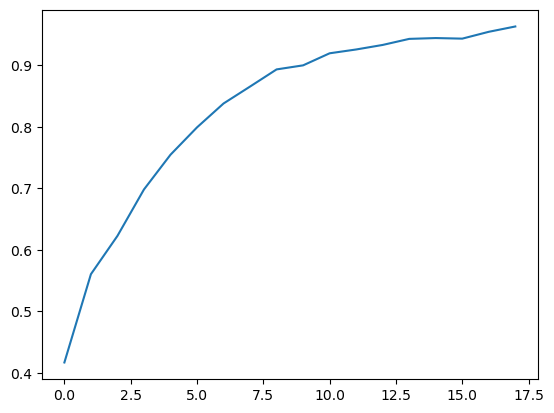

In [52]:
accu = history.history['accuracy']
plt.plot(accu)

In [53]:
# Function to read images as array

def read_image(fn):
    image = Image.open(fn)
    return np.asarray(image.resize((160,160)))
# Function to predict

def test_predict(test_image):
    result = inception_model.predict(np.asarray([read_image(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)
    return prediction

In [54]:
import os
import pandas as pd

# Define the path to the folder containing the images
folder_path = "/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test"

# Create an empty dataframe to store the results
predictions_df = pd.DataFrame(columns=["image_name", "prediction"])

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".jpg"): # Adjust the file extension to match your image format
        # Make a prediction for the current image file
        prediction = test_predict(os.path.join(folder_path, file_name))
        
        # Add the prediction result to the dataframe
        predictions_df = pd.concat([predictions_df, pd.DataFrame({"image_name": [file_name], "prediction": [prediction]})], ignore_index=True)

1/1 [==============================] - 2s 2s/step
probability: 97.25822806358337%
Predicted class :  0
1/1 [==============================] - 0s 33ms/step
probability: 75.66260695457458%
Predicted class :  8
1/1 [==============================] - 0s 34ms/step
probability: 99.97686743736267%
Predicted class :  13
1/1 [==============================] - 0s 29ms/step
probability: 99.99299049377441%
Predicted class :  13
1/1 [==============================] - 0s 30ms/step
probability: 99.99512434005737%
Predicted class :  3
1/1 [==============================] - 0s 29ms/step
probability: 99.86925721168518%
Predicted class :  13
1/1 [==============================] - 0s 29ms/step
probability: 40.75444936752319%
Predicted class :  11
1/1 [==============================] - 0s 32ms/step
probability: 96.38887643814087%
Predicted class :  6
1/1 [==============================] - 0s 27ms/step
probability: 87.6559317111969%
Predicted class :  13
1/1 [==============================] - 0s 28ms/step
p

In [55]:
inception_csv=predictions_df


In [57]:
label_map = {
    0: "sitting",
    1: "using laptop",
    2: "hugging",
    3: "sleeping",
    4: "drinking",
    5: "clapping",
    6: "dancing",
    7: "cycling",
    8: "calling",
    9: "laughing",
    10: "eating",
    11: "fighting",
    12: "listening_to_music",
    13: "running",
    14: "texting"
}

In [58]:
inception_csv["prediction"] = inception_csv["prediction"].map(label_map)
output_filename = "inception_pred.csv"

# Save the dataframe as a CSV file
inception_csv.to_csv(os.path.join(output_filename), index=False)

In [60]:
from IPython.display import FileLink
FileLink("inception_pred.csv")

/kaggle/working/inception_pred.csv